In [3]:
# Celda 1 — Imports y carga
import pandas as pd
import matplotlib.pyplot as plt

# Ruta relativa desde /notebooks a /data/raw
csv_path = "../data/raw/orders_sample.csv"  # p. ej.: "../data/raw/orders_sample.csv"

# Carga parseando la columna de fecha
df = pd.read_csv(csv_path, parse_dates=["date"])  # TODO: completa argumentos

# Vistazo rápido
#df.head() # mostrar 5 filas
#df.info() # mostrar dtypes

In [4]:
# Celda 2 — Conteos y columna derivada
# Conteo de estados y países
status_counts = df["status"].value_counts()      # TODO: value_counts sobre df["status"]
country_counts = df["country"].value_counts()     # TODO: value_counts sobre df["country"]

# Crear columna order_total = units * unit_price
df["order_total"] = df["units"] * df["unit_price"]  # TODO: operación vectorizada

# Vista de algunas columnas clave
df[["units", "unit_price", "order_total"]].head()  # TODO: selecciona columnas

,units,unit_price,order_total
0,2,12.0,24.0
1,1,9.0,9.0
2,1,640.0,640.0
3,3,29.9,89.7
4,1,179.0,179.0


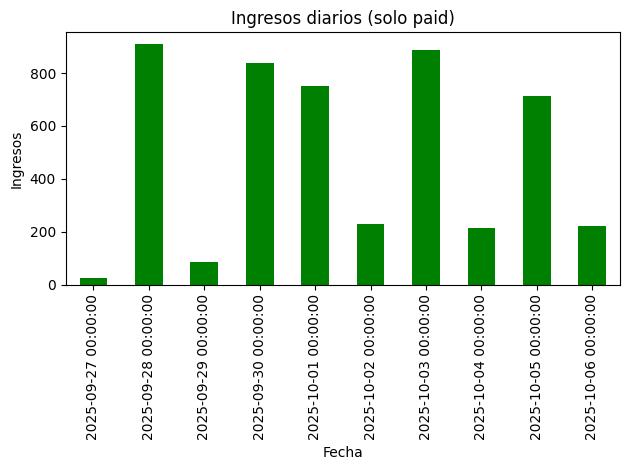

In [7]:
# Celda 3 — Ingresos diarios (paid)
df_paid = df[df["status"] == "paid"].copy()  # Filtra solo pedidos pagados

daily_rev = df_paid.groupby("date")["order_total"].sum()  # TODO: agrupa por "date" y suma "order_total"

ax = daily_rev.plot(kind="bar", title="Ingresos diarios (solo paid)", color="green")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ingresos")
plt.tight_layout()
plt.show()

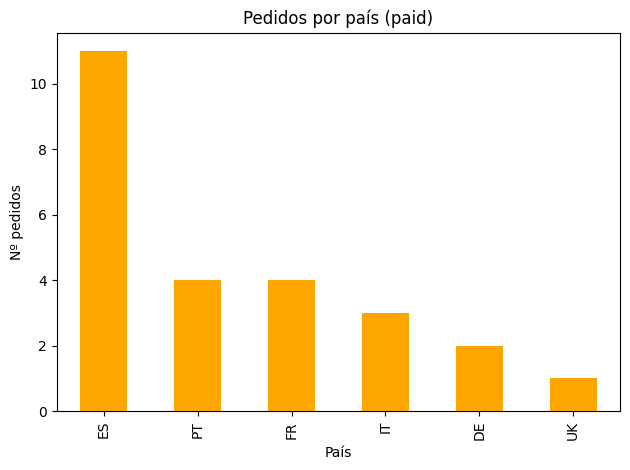

In [8]:
# Celda 4 — Pedidos por país (paid)
paid_country_counts = df_paid["country"].value_counts()  # TODO: columna país

ax = paid_country_counts.plot(kind="bar", title="Pedidos por país (paid)", color="orange")
ax.set_xlabel("País")
ax.set_ylabel("Nº pedidos")
plt.tight_layout()
plt.show()

In [18]:
# Celda 5 — Filtros + KPIs manuales
start = "2025-09-27"   # puedes cambiarlo
end = "2025-10-01"   # puedes cambiarlo
country = "ES"         # puedes cambiarlo

mask = (
    (df["date"] >= pd.to_datetime(start)) &   # TODO: start
    (df["date"] <= pd.to_datetime(end)) &   # TODO: end
    (df["country"] == country)                  # TODO: país
)
sub = df[mask].copy()
sub_paid = sub[sub["status"] == "paid"].copy()   # TODO: paid (aprovecha para fijarte como funciona una mascara)

num_orders = sub_paid["order_id"].count()  # TODO: nº filas
total_revenue = sub_paid["order_total"].sum()  # TODO: suma de units * unit_price en sub_paid
avg_order_value = round(total_revenue / num_orders, 2) if num_orders > 0 else 0.0  # TODO: media condicionada (cuidado con 0 pedidos)

print("Número de ordenes: {num_orders}, Cuánto generamos: {total_revenue}, Media de ordenes: {avg_order_value}".format(
    num_orders=num_orders,
    total_revenue=total_revenue,
    avg_order_value=avg_order_value))

Número de ordenes: 6, Cuánto generamos: 1618.0, Media de ordenes: 269.67


* Filtros aplicables (`start`, `end`, `country`).
* KPIs **solo con `status="paid"`**.
* Redondeos (p. ej., 2 decimales).
* Si `num_orders==0`, `avg_order_value = 0.0`.